Best Params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 20}
MAE: 7.564566077560635
RMSE: 9.195070672239858
R2 Score: 0.2971780201602172


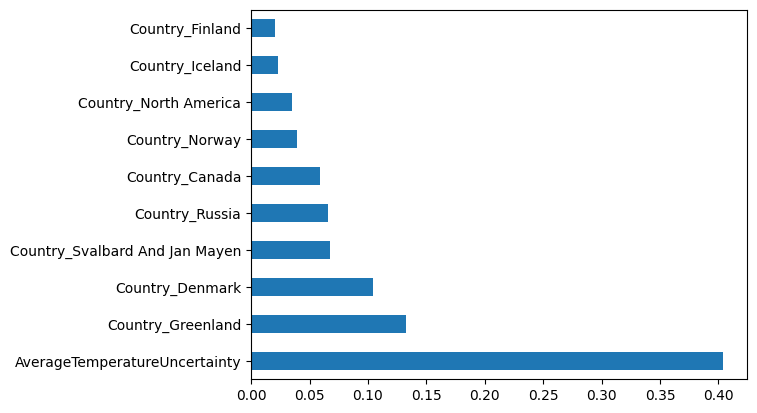

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Carregar os dados
data = pd.read_csv('GlobalLandTemperaturesByCountry.csv')

# Remover linhas com valores ausentes
data = data.dropna()

# Codificar a variável categórica 'Country' usando one-hot encoding
data = pd.get_dummies(data, columns=['Country'], drop_first=True)

# Definir variáveis independentes (X) e dependentes (y)
X = data.drop(columns=['dt', 'AverageTemperature'])
y = data['AverageTemperature']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Amostrar uma parte dos dados para acelerar a execução
X_train_sample = X_train.sample(frac=0.1, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

# Criar o modelo Random Forest inicial
model = RandomForestRegressor(random_state=42, n_jobs=-1)

# Parâmetros para GridSearchCV com menos combinações
params = {
    'n_estimators': [10, 20],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5]
}

# Aplicar GridSearchCV
grid_search = GridSearchCV(model, params, cv=2, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_sample, y_train_sample)

# Melhor modelo encontrado pelo GridSearchCV
best_model = grid_search.best_estimator_

# Fazer previsões no conjunto de teste com o melhor modelo
y_pred = best_model.predict(X_test)

# Avaliar o modelo usando métricas de erro
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Best Params: {grid_search.best_params_}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

# Visualizar a importância das variáveis do melhor modelo
feature_importances = pd.Series(best_model.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()